In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from api_keys import api_key

from citipy import citipy

In [2]:
output_data_file = "C:\\Users\\Portales Ely\\Desktop\\output_data\\cities.csv"

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:

lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)


len(cities)

609

In [5]:
base_url ='http://api.openweathermap.org/data/2.5/weather?'

cr= 0
city_df = pd.DataFrame(columns=["City", "Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
units="imperial"
for city in cities:
    cr += 1
    #params = {"name":city, "appid":api_key}
    query_url = f"{base_url}appid={api_key}&q={city}&units={units}"
    try:   
        #print(query_url)
        response = requests.get(query_url)
        cityweather = response.json()
        print(f"Processing City: {city}, Record  {str(cr)} of {str(len(cities))}")
        
        if cityweather["cod"] !="404":
            city_df = city_df.append({"City":city, 
                    "Cloudiness" : cityweather['clouds']['all'],
                    "Country":  cityweather['sys']['country'],
                    "Date":  cityweather['dt'],
                    "Humidity":  cityweather['main']['humidity'],
                    "Lat":  cityweather['coord']['lat'],
                    "Lng": cityweather['coord']['lon'],
                    "Max Temp":  cityweather['main']['temp_max'],
                    "Wind Speed":  cityweather['wind']['speed']},
                   ignore_index=True)
        else:
            print(f"City:{city} not found")
        
    except ("KeyError"):
         print (f"Key error occured for {city}")

Processing City: belushya guba, Record  1 of 609
City:belushya guba not found
Processing City: cape town, Record  2 of 609
Processing City: dunda, Record  3 of 609
Processing City: kapaa, Record  4 of 609
Processing City: tsihombe, Record  5 of 609
City:tsihombe not found
Processing City: vardo, Record  6 of 609
Processing City: hermanus, Record  7 of 609
Processing City: port lincoln, Record  8 of 609
Processing City: hilo, Record  9 of 609
Processing City: agirish, Record  10 of 609
Processing City: chapais, Record  11 of 609
Processing City: saskylakh, Record  12 of 609
Processing City: taolanaro, Record  13 of 609
City:taolanaro not found
Processing City: bharuch, Record  14 of 609
Processing City: port elizabeth, Record  15 of 609
Processing City: georgetown, Record  16 of 609
Processing City: punta arenas, Record  17 of 609
Processing City: umzimvubu, Record  18 of 609
City:umzimvubu not found
Processing City: akdagmadeni, Record  19 of 609
Processing City: tuktoyaktuk, Record  2

Processing City: xining, Record  170 of 609
Processing City: castro, Record  171 of 609
Processing City: novaya lyalya, Record  172 of 609
Processing City: lasa, Record  173 of 609
Processing City: severo-kurilsk, Record  174 of 609
Processing City: srandakan, Record  175 of 609
Processing City: pevek, Record  176 of 609
Processing City: yar-sale, Record  177 of 609
Processing City: airai, Record  178 of 609
Processing City: magadan, Record  179 of 609
Processing City: nouadhibou, Record  180 of 609
Processing City: jaffna, Record  181 of 609
Processing City: bayan, Record  182 of 609
Processing City: palmer, Record  183 of 609
Processing City: tuatapere, Record  184 of 609
Processing City: ibaiti, Record  185 of 609
Processing City: pativilca, Record  186 of 609
Processing City: batemans bay, Record  187 of 609
Processing City: kudat, Record  188 of 609
Processing City: norman wells, Record  189 of 609
Processing City: alice springs, Record  190 of 609
Processing City: seoul, Record  

Processing City: porto novo, Record  339 of 609
Processing City: karamea, Record  340 of 609
City:karamea not found
Processing City: chicama, Record  341 of 609
Processing City: leiyang, Record  342 of 609
Processing City: tiksi, Record  343 of 609
Processing City: gongzhuling, Record  344 of 609
Processing City: vila franca do campo, Record  345 of 609
Processing City: metro, Record  346 of 609
Processing City: stromness, Record  347 of 609
Processing City: wa, Record  348 of 609
City:wa not found
Processing City: sangar, Record  349 of 609
Processing City: mentok, Record  350 of 609
City:mentok not found
Processing City: mareeba, Record  351 of 609
Processing City: souillac, Record  352 of 609
Processing City: sechura, Record  353 of 609
Processing City: tual, Record  354 of 609
Processing City: esperance, Record  355 of 609
Processing City: sorvag, Record  356 of 609
City:sorvag not found
Processing City: mount hagen, Record  357 of 609
Processing City: saint-francois, Record  358 o

Processing City: lichuan, Record  507 of 609
Processing City: gumushane, Record  508 of 609
City:gumushane not found
Processing City: tonneins, Record  509 of 609
Processing City: lagoa, Record  510 of 609
Processing City: raymondville, Record  511 of 609
Processing City: san miguel, Record  512 of 609
Processing City: eyrarbakki, Record  513 of 609
Processing City: alofi, Record  514 of 609
Processing City: kysyl-syr, Record  515 of 609
Processing City: aborlan, Record  516 of 609
Processing City: samarai, Record  517 of 609
Processing City: talnakh, Record  518 of 609
Processing City: usinsk, Record  519 of 609
Processing City: santa isabel do rio negro, Record  520 of 609
Processing City: viedma, Record  521 of 609
Processing City: fort-shevchenko, Record  522 of 609
Processing City: ambodifototra, Record  523 of 609
City:ambodifototra not found
Processing City: umm jarr, Record  524 of 609
City:umm jarr not found
Processing City: lethem, Record  525 of 609
Processing City: chumikan

In [6]:
export_csv = city_df.to_csv(output_data_file, index = None, header=True) 

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,49,ZA,1570748251,82,-33.93,18.42,61,8.05
1,dunda,0,IN,1570748251,85,30.62,78.32,52.05,4.11
2,kapaa,1,US,1570748252,74,22.08,-159.32,91.4,5.82
3,vardo,1,US,1570748252,60,39.62,-77.74,75.2,3.36
4,hermanus,93,ZA,1570747823,86,-34.42,19.24,55.99,5.01


In [7]:
import datetime
today = datetime.datetime.today().strftime('%m/%d/%y')

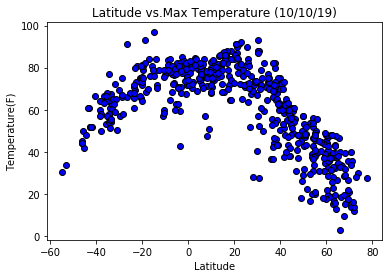

In [8]:
plt.scatter(city_df['Lat'], city_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs.Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel('Temperature(F)')
plt.savefig("LatvsTemp")
plt.show()


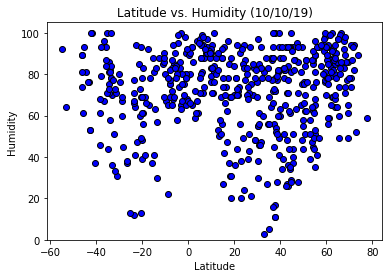

In [14]:
plt.scatter(city_df['Lat'], city_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.ylim((0, 105))
plt.savefig("LatvsHumid")
plt.show()

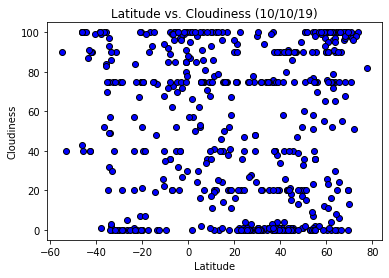

In [10]:

plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.savefig("LatvsCloud")
plt.show()

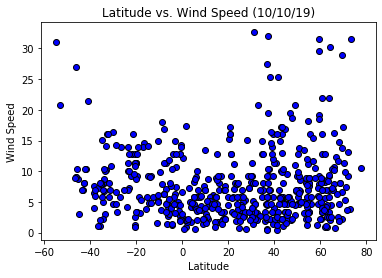

In [11]:
plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")
plt.title(f"Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
plt.savefig("LatvsWSpeed")
plt.show()